In [2]:
import psycopg2
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks", color_codes=True)
import matplotlib
import warnings
import yellowbrick as yb
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
conn = psycopg2.connect( 
                        host = 'project.cgxhdwn5zb5t.us-east-1.rds.amazonaws.com',
                        port = 5432, 
                        user = 'postgres',
                        password = 'Admin123',
                        database = 'postgres')
cursor = conn.cursor()

In [4]:
DEC2FLOAT = psycopg2.extensions.new_type(
    psycopg2.extensions.DECIMAL.values,
    'DEC2FLOAT',
    lambda value, curs: float(value) if value is not None else None)
psycopg2.extensions.register_type(DEC2FLOAT)

In [5]:
cursor.execute('Select * from "AHS_Household_Class"')
rows = cursor.fetchall()
col_names = []
for elt in cursor.description:
    col_names.append(elt[0])

df = pd.DataFrame(data=rows, columns=col_names )

In [5]:
df.head()

,index,CONTROL,YEAR,RATINGHS,RATINGNH,TOTROOMS,PERPOVLVL,DINING,LAUNDY,STORIES,...,KITCHSINK,WASHER,WINBARS,HHHEAR,HHSEE,HHMEMRY,HHWALK,HHCARE,HHERRND,FIRSTHOME
0,0,11000006,2017,10.0,10.0,5.0,361.0,0.0,1.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,1,11000016,2017,8.0,9.0,6.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,2,11000017,2017,9.0,10.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,3,11000023,2017,8.0,8.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,4,11000046,2017,10.0,5.0,5.0,52.0,0.0,0.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 97 columns):
index         27914 non-null int64
CONTROL       27914 non-null int64
YEAR          27914 non-null int64
RATINGHS      27914 non-null float64
RATINGNH      27914 non-null float64
TOTROOMS      27914 non-null float64
PERPOVLVL     27914 non-null float64
DINING        27914 non-null float64
LAUNDY        27914 non-null float64
STORIES       27914 non-null float64
HHAGE         27914 non-null float64
HHMOVE        27914 non-null float64
PARTNER       27914 non-null float64
NUMELDERS     27914 non-null float64
NUMADULTS     27914 non-null float64
NUMNONREL     27914 non-null float64
HHYNGKIDS     27914 non-null float64
HHOLDKIDS     27914 non-null float64
NUMVETS       27914 non-null float64
NUMYNGKIDS    27914 non-null float64
NUMOLDKIDS    27914 non-null float64
NUMSUBFAM     27914 non-null float64
NUMSECFAM     27914 non-null float64
NUMPEOPLE     27914 non-null float64
HHADLTKID

In [7]:
df.describe()

,index,CONTROL,YEAR,RATINGHS,RATINGNH,TOTROOMS,PERPOVLVL,DINING,LAUNDY,STORIES,...,KITCHSINK,WASHER,WINBARS,HHHEAR,HHSEE,HHMEMRY,HHWALK,HHCARE,HHERRND,FIRSTHOME
count,27914.000000,2.791400e+04,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,...,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.000000,27914.0
mean,14393.347854,1.104320e+07,2015.968045,8.428745,8.211865,6.097980,333.818801,0.574121,0.329906,1.891524,...,1.002472,1.047682,1.499069,1.952246,1.973239,1.968869,1.927169,1.982231,1.964319,1.0
std,8317.722314,2.475374e+04,0.999507,1.551730,1.724360,1.406657,159.912541,0.530216,0.498157,0.983938,...,0.049657,0.213097,1.859563,0.213249,0.161386,0.173676,0.259863,0.132113,0.185497,0.0
min,0.000000,1.100001e+07,2015.000000,1.000000,-6.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,-6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
25%,7194.250000,1.102189e+07,2015.000000,8.000000,7.000000,5.000000,198.000000,0.000000,0.000000,1.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
50%,14374.500000,1.104329e+07,2015.000000,8.000000,8.000000,6.000000,358.000000,1.000000,0.000000,2.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
75%,21601.750000,1.106461e+07,2017.000000,10.000000,10.000000,7.000000,501.000000,1.000000,1.000000,3.000000,...,1.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0
max,28803.000000,1.108703e+07,2017.000000,10.000000,10.000000,13.000000,501.000000,2.000000,2.000000,7.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.0


In [8]:
#identify  any null values
null_columns=df.columns[df.isnull().any()]
df[null_columns].isnull().sum()

Series([], dtype: float64)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27914 entries, 0 to 27913
Data columns (total 97 columns):
index         27914 non-null int64
CONTROL       27914 non-null int64
YEAR          27914 non-null int64
RATINGHS      27914 non-null float64
RATINGNH      27914 non-null float64
TOTROOMS      27914 non-null float64
PERPOVLVL     27914 non-null float64
DINING        27914 non-null float64
LAUNDY        27914 non-null float64
STORIES       27914 non-null float64
HHAGE         27914 non-null float64
HHMOVE        27914 non-null float64
PARTNER       27914 non-null float64
NUMELDERS     27914 non-null float64
NUMADULTS     27914 non-null float64
NUMNONREL     27914 non-null float64
HHYNGKIDS     27914 non-null float64
HHOLDKIDS     27914 non-null float64
NUMVETS       27914 non-null float64
NUMYNGKIDS    27914 non-null float64
NUMOLDKIDS    27914 non-null float64
NUMSUBFAM     27914 non-null float64
NUMSECFAM     27914 non-null float64
NUMPEOPLE     27914 non-null float64
HHADLTKID

In [10]:
# Change the data type to int32
df.astype('int32').dtypes

index        int32
CONTROL      int32
YEAR         int32
RATINGHS     int32
RATINGNH     int32
             ...  
HHMEMRY      int32
HHWALK       int32
HHCARE       int32
HHERRND      int32
FIRSTHOME    int32
Length: 97, dtype: object

In [11]:
df.columns

Index(['index', 'CONTROL', 'YEAR', 'RATINGHS', 'RATINGNH', 'TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMI

In [12]:
#### MISSING MORTAMT??

## Distribution 

In [13]:
matplotlib.style.use('ggplot')

In [14]:
#Small sub set of data for visualization
df_sub = df.loc[:,['HINCP','RATINGHS', 'TOTROOMS','DINING', 'LAUNDY', 'STORIES', 'FRIDGE', 'KITCHSINK', 'COOKFUEL', 'FIREPLACE', 'OWNLOT', 'HHSEX']]
df_rooms = df.loc[:, ['LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS','NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS']]
df_move = df.loc[:, ['RMCHANGE', 'RMCOMMUTE','RMCOSTS', 'RMFAMILY', 'RMHOME', 'RMHOOD', 'RMJOB', 'RMOWNHH','RMOTHER']]
df_exp = df.loc[:, ['ELECAMT', 'GASAMT', 'OILAMT', 'OTHERAMT','TRASHAMT', 'WATERAMT', 'UTILAMT']]
df_search = df.loc[:, ['NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK','NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU','NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 
                   'SEARCHNET', 'SEARCHOTH','SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN']]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c23152160>,
      dtype=object)

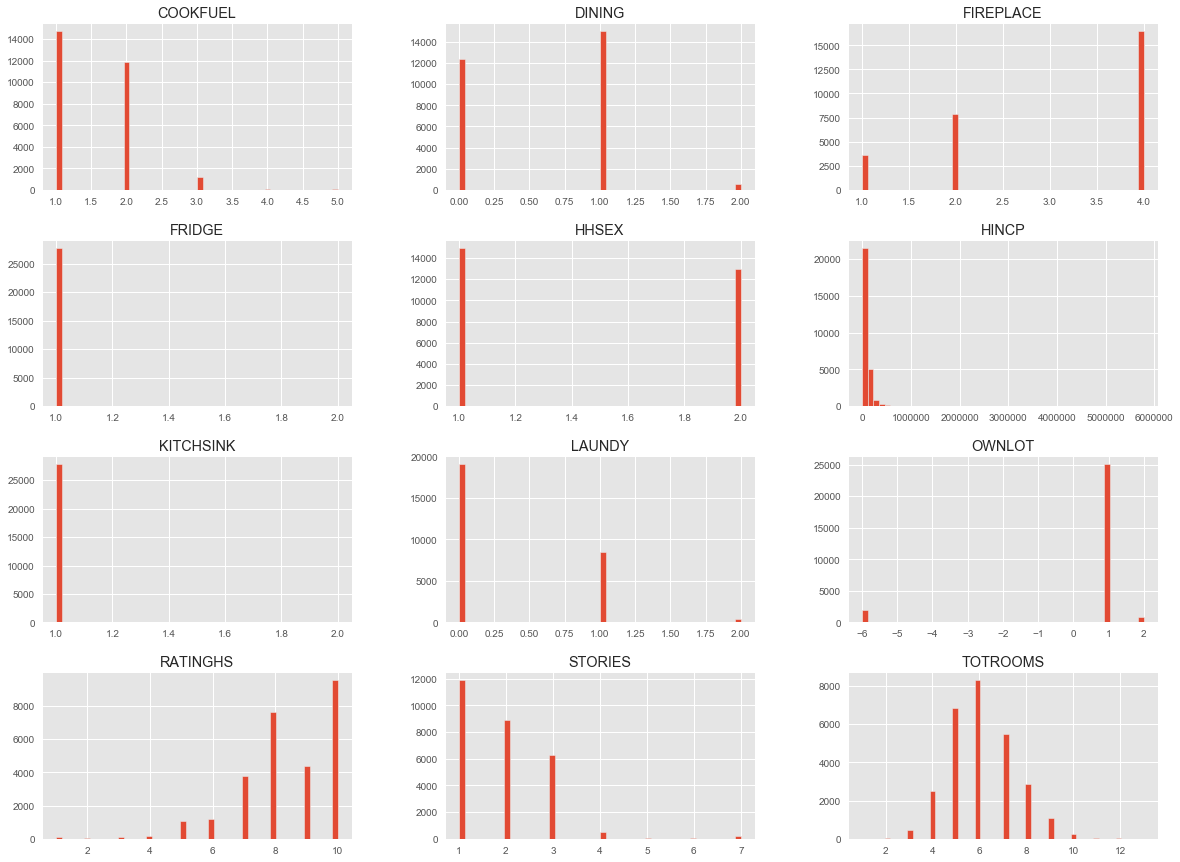

In [15]:
df_sub.hist(bins=50, figsize=(20,15))

##### Fridge and Kitchsink have only Yes values - do we need this feature for our model

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2740a7b8>,
      dtype=object)

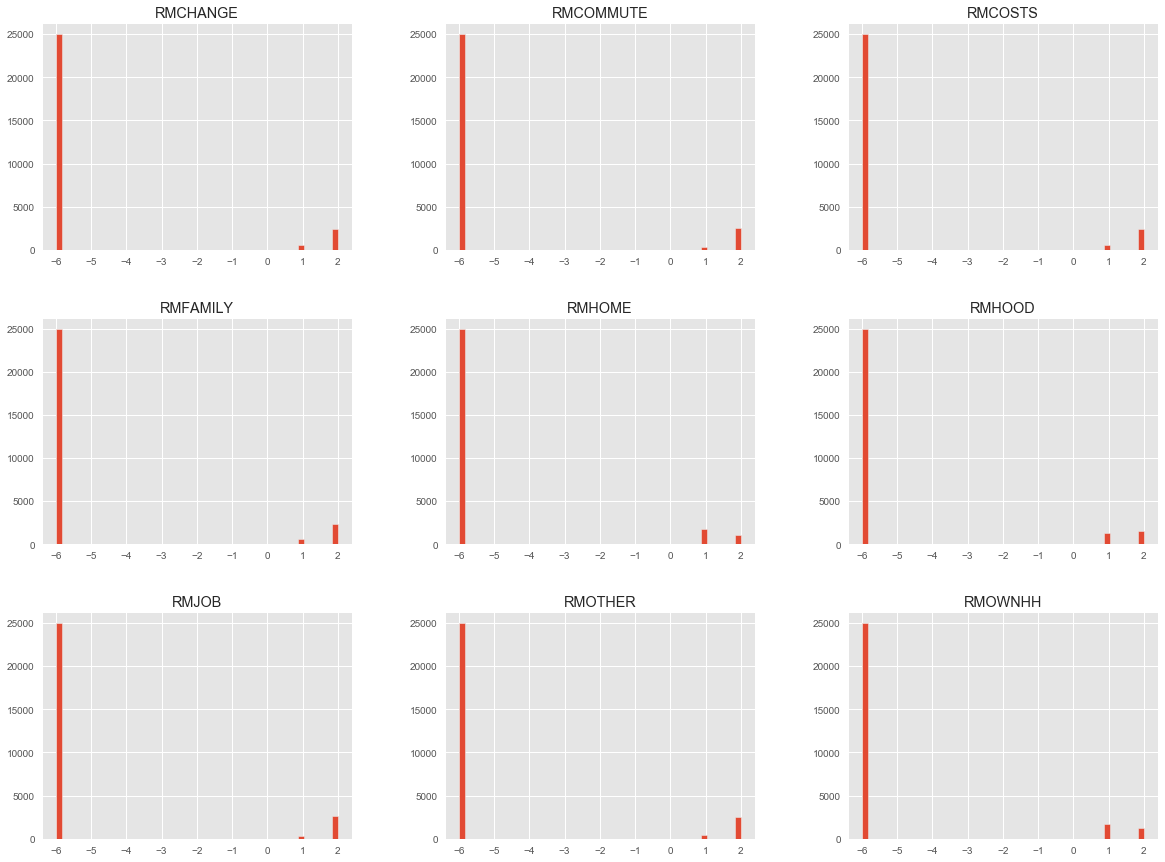

In [16]:
df_move.hist(bins=50, figsize=(20,15))

#### alot of -6 values for move relative features 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c24ccf0f0>,
      dtype=object)

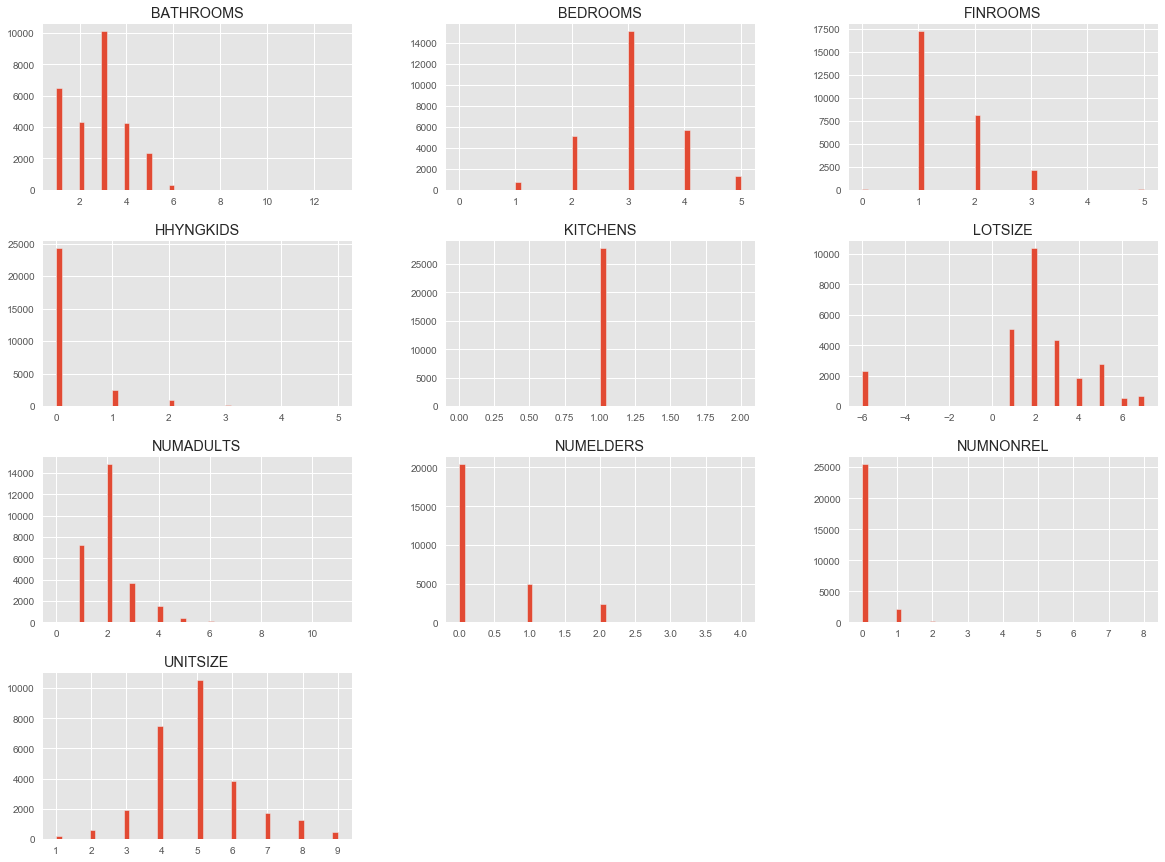

In [17]:
df_rooms.hist(bins=50, figsize=(20,15))

#### Seem like every unit has one kitchen - should we drop this feature?



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c25eba4a8>,
      dtype=object)

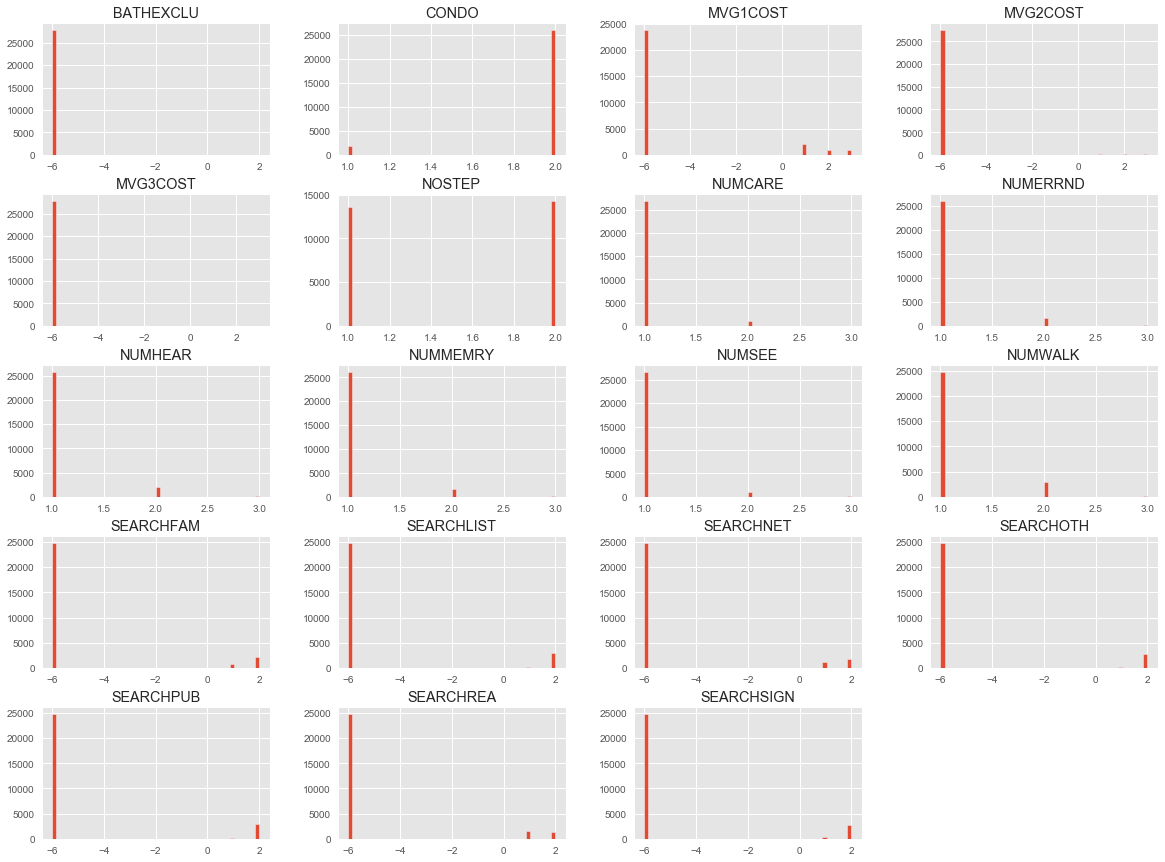

In [18]:
df_search.hist(bins=50, figsize=(20,15))

####  should we drop few features?


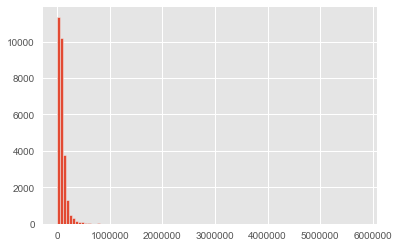

In [19]:
#Household Income (past 12 months)
df_sub['HINCP'].hist(bins=100)

In [20]:
#Monthly total mortgage amount (all mortgages)
#df_sub['MORTAMT'].value_counts()

In [21]:
#df_sub['MORTAMT'].value_counts()

In [22]:
df_sub['HINCP'].value_counts()

50000.0     428
60000.0     425
100000.0    405
40000.0     392
80000.0     362
           ... 
832400.0      1
123180.0      1
63010.0       1
52160.0       1
13010.0       1
Name: HINCP, Length: 4524, dtype: int64

In [23]:
#Transform the income from year to monthly
df_sub['HINCP']= df_sub['HINCP'].divide(12)
df_sub['HINCP']

0         4891.666667
1        10500.000000
2        11083.333333
3         8333.333333
4         1250.000000
             ...     
27909     6666.666667
27910     3916.666667
27911     7500.000000
27912      166.666667
27913     1500.000000
Name: HINCP, Length: 27914, dtype: float64

In [24]:
#Correlation with target to other features
corr_matrix = df_sub.corr()
corr_matrix['RATINGHS'].sort_values(ascending=False)

RATINGHS     1.000000
TOTROOMS     0.129784
DINING       0.055079
LAUNDY       0.041094
HINCP        0.035304
STORIES      0.030908
HHSEX        0.013541
OWNLOT       0.003767
COOKFUEL    -0.012604
FRIDGE      -0.013306
KITCHSINK   -0.025843
FIREPLACE   -0.091993
Name: RATINGHS, dtype: float64

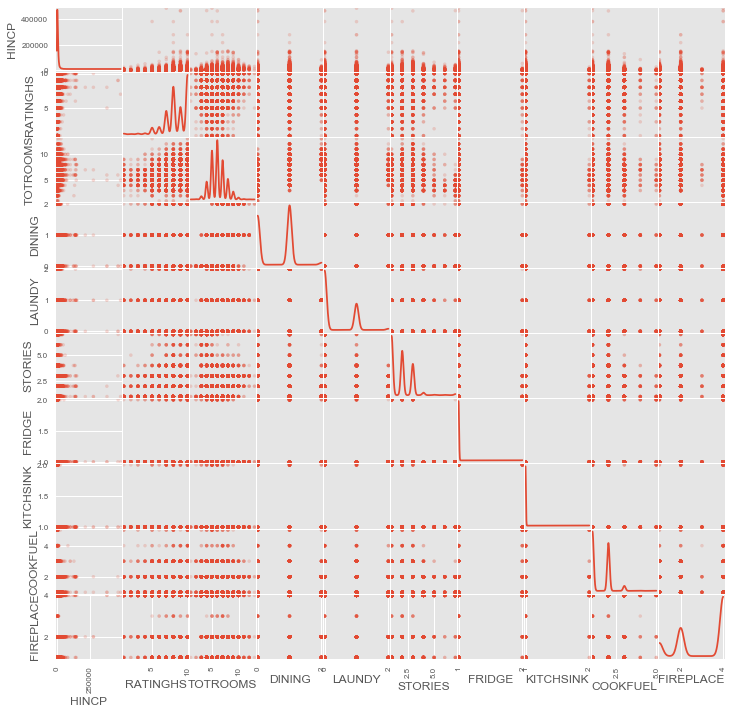

In [25]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
#attributes = ['RATINGHS', 'HINCP', 'UNITSIZE', 'BEDROOMS', 'BLD' ]
attributes = ['HINCP','RATINGHS', 'TOTROOMS','DINING', 'LAUNDY', 'STORIES', 'FRIDGE', 'KITCHSINK', 'COOKFUEL', 'FIREPLACE']
scatter_matrix(df_sub[attributes], alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

### Run the correlation again

In [27]:
corr_matrix = df.corr()
corr_matrix['RATINGHS'].sort_values(ascending=False)

RATINGHS     1.000000
RATINGNH     0.576725
UNITSIZE     0.145639
BATHROOMS    0.142639
TOTROOMS     0.129784
               ...   
WASHER      -0.067569
HHMAR       -0.073470
HHMOVE      -0.076534
FIREPLACE   -0.091993
FIRSTHOME         NaN
Name: RATINGHS, Length: 97, dtype: float64

 ### Rank-by-feature

To visualize the correlation matrix for your features

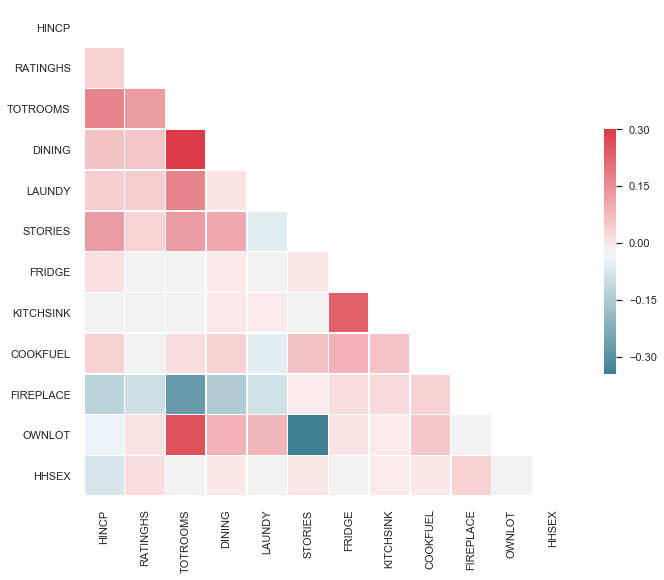

In [28]:
from string import ascii_letters as letters
sns.set(style="white")

# Compute the correlation matrix
corr = df_sub.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

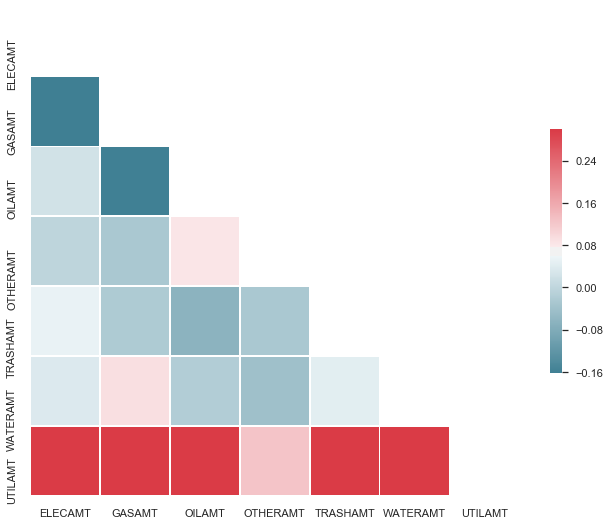

In [29]:
from string import ascii_letters as letters
sns.set(style="white")

# Compute the correlation matrix
corr = df_exp.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

In [6]:
# Will drop features ELECAMT', 'GASAMT', 'OILAMT', 'OTHERAMT','TRASHAMT', 'WATERAMT' and Keep only utilamount 
df.drop(columns=['ELECAMT', 'GASAMT', 'OILAMT', 'OTHERAMT','TRASHAMT', 'WATERAMT'])


,index,CONTROL,YEAR,RATINGHS,RATINGNH,TOTROOMS,PERPOVLVL,DINING,LAUNDY,STORIES,...,KITCHSINK,WASHER,WINBARS,HHHEAR,HHSEE,HHMEMRY,HHWALK,HHCARE,HHERRND,FIRSTHOME
0,0,11000006,2017,10.0,10.0,5.0,361.0,0.0,1.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
1,1,11000016,2017,8.0,9.0,6.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
2,2,11000017,2017,9.0,10.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
3,3,11000023,2017,8.0,8.0,7.0,501.0,1.0,0.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
4,4,11000046,2017,10.0,5.0,5.0,52.0,0.0,0.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
5,5,11000048,2017,9.0,8.0,7.0,406.0,1.0,1.0,3.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
6,6,11000052,2017,5.0,10.0,6.0,113.0,0.0,0.0,2.0,...,1,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
7,7,11000054,2017,8.0,6.0,4.0,501.0,0.0,0.0,7.0,...,1,1,-6.0,2.0,2.0,2.0,2.0,2.0,2.0,1
8,8,11000062,2017,6.0,5.0,4.0,104.0,0.0,0.0,1.0,...,1,2,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1
9,9,11000066,2017,4.0,7.0,4.0,117.0,0.0,0.0,1.0,...,1,1,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1


In [31]:
df.columns

Index(['index', 'CONTROL', 'YEAR', 'RATINGHS', 'RATINGNH', 'TOTROOMS',
       'PERPOVLVL', 'DINING', 'LAUNDY', 'STORIES', 'HHAGE', 'HHMOVE',
       'PARTNER', 'NUMELDERS', 'NUMADULTS', 'NUMNONREL', 'HHYNGKIDS',
       'HHOLDKIDS', 'NUMVETS', 'NUMYNGKIDS', 'NUMOLDKIDS', 'NUMSUBFAM',
       'NUMSECFAM', 'NUMPEOPLE', 'HHADLTKIDS', 'MULTIGEN', 'UFINROOMS',
       'LOTSIZE', 'FINROOMS', 'UNITSIZE', 'BEDROOMS', 'KITCHENS', 'BATHROOMS',
       'MVG1PER', 'MVG2PER', 'MVG3PER', 'HINCP', 'FINCP', 'ELECAMT', 'GASAMT',
       'OILAMT', 'OTHERAMT', 'TRASHAMT', 'WATERAMT', 'UTILAMT', 'DIVISION',
       'OMB13CBSA', 'BLD', 'HHMAR', 'MILHH', 'HHRACE', 'HHNATVTY', 'HSHLDTYPE',
       'COOKFUEL', 'FIREPLACE', 'NUMHEAR', 'NUMSEE', 'NUMMEMRY', 'NUMWALK',
       'NUMCARE', 'NUMERRND', 'MVG1COST', 'MVG2COST', 'MVG3COST', 'BATHEXCLU',
       'NOSTEP', 'CONDO', 'SEARCHFAM', 'SEARCHLIST', 'SEARCHNET', 'SEARCHOTH',
       'SEARCHPUB', 'SEARCHREA', 'SEARCHSIGN', 'RMCHANGE', 'RMCOMMUTE',
       'RMCOSTS', 'RMFAMI

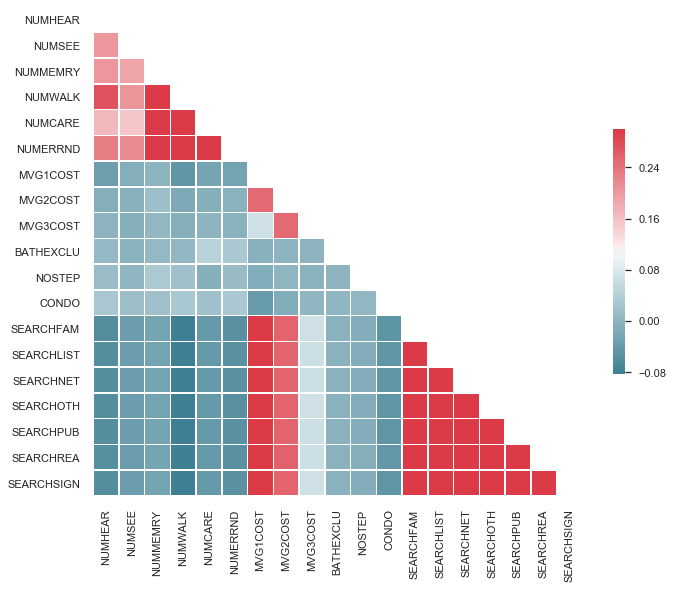

In [32]:
from string import ascii_letters as letters
sns.set(style="white")

# Compute the correlation matrix
corr = df_search.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

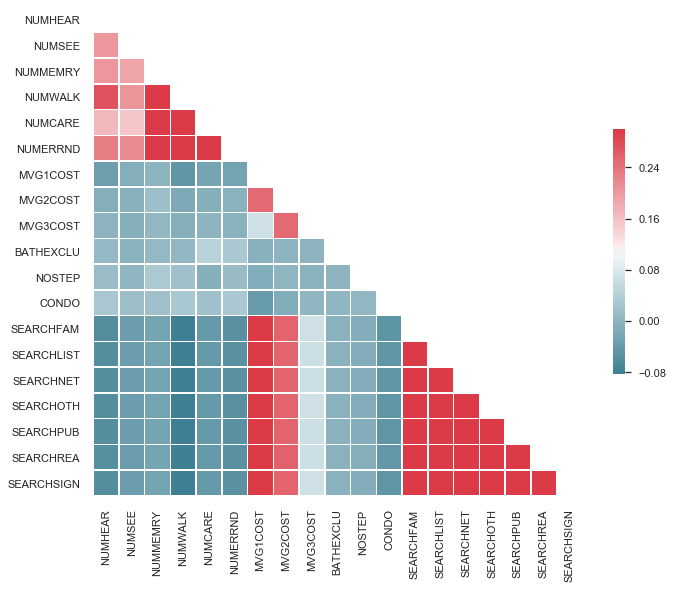

In [33]:
from string import ascii_letters as letters
sns.set(style="white")

# Compute the correlation matrix
corr = df_search.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

## Balanced Binning

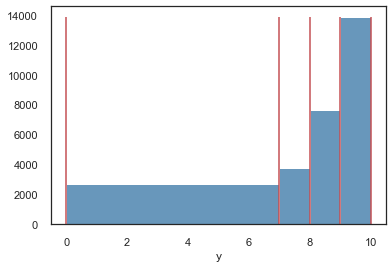

In [34]:
from yellowbrick.datasets import load_concrete
from yellowbrick.target import BalancedBinningReference


# Instantiate the visualizer
visualizer = BalancedBinningReference(bins=[0,7,8,9,10])

y = df_sub['RATINGHS']
visualizer.fit(y)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

In [35]:
#df['RATINGHS'].value_counts()

In [36]:
#df_sub['RATINGHS'].isna().sum()

## Feature Analysis


In [7]:


LABEL_MAP = {
    1: "Un-Satisfied",
    2: "Un-Satisfied",
    3: "Un-Satisfied",
    4: "Un-Satisfied",
    5: "Un-Satisfied",
    6: "Un-Satisfied",
    7: "Satisfied",
    8: "Satisfied",
    9: "Highly Satisfied",
    10: "Extreme Satisfied"
}

# Convert class labels into text
df_sub['RATINGHS'] = df_sub['RATINGHS'].map(LABEL_MAP)


NameError: name 'df_sub' is not defined

In [38]:
#df_sub['RATINGHS'] = df_sub['RATINGHS'].astype(str)
df_sub['RATINGHS']

0        Extreme Satisfied
1                Satisfied
2         Highly Satisfied
3                Satisfied
4        Extreme Satisfied
               ...        
27909    Extreme Satisfied
27910            Satisfied
27911    Extreme Satisfied
27912            Satisfied
27913     Highly Satisfied
Name: RATINGHS, Length: 27914, dtype: object

In [39]:
# Extract our X and y data
X = df_sub[['TOTROOMS','DINING', 'LAUNDY', 'STORIES', 'FRIDGE', 'KITCHSINK', 'COOKFUEL', 'FIREPLACE']]
y = df_sub['RATINGHS'].values

### Encode our target variable

In [10]:
from sklearn.preprocessing import LabelEncoder
# Encode our target variable
y = df['RATINGHS'].values
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

y

array([9, 7, 8, ..., 9, 7, 8])

In [41]:
print(X.shape, y.shape)

(27914, 8) (27914,)


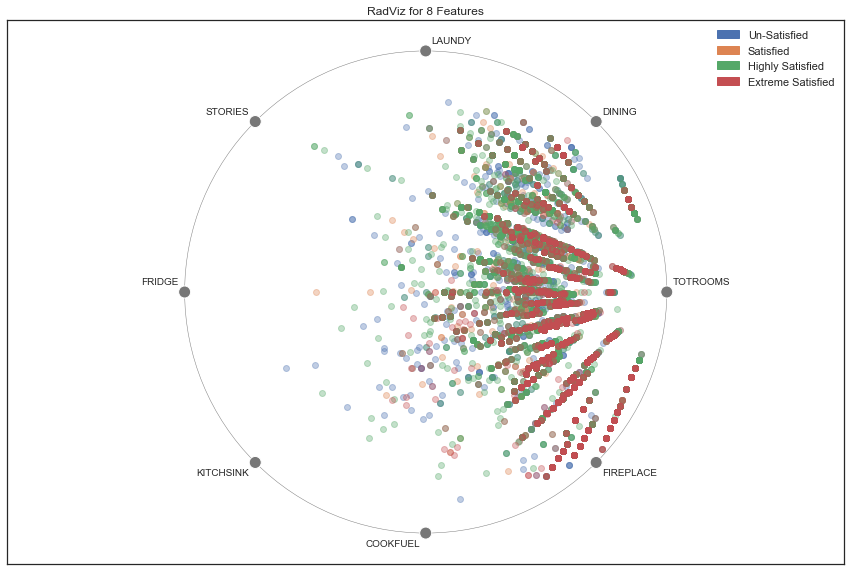

In [42]:
from yellowbrick.features import RadViz
classes = ["Un-Satisfied", "Satisfied","Highly Satisfied","Extreme Satisfied"]

_ = RadViz(size=(1080, 720),classes=classes, alpha=0.35).fit_transform_show(X, y)

## Parallel Coordinates


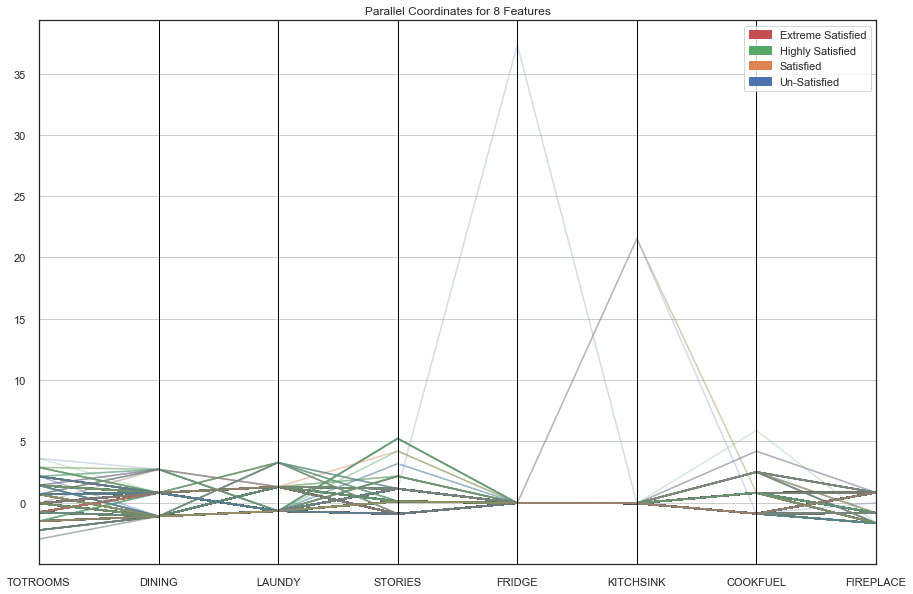

In [43]:
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
features = [
    'TOTROOMS','DINING', 'LAUNDY', 'STORIES', 'FRIDGE', 'KITCHSINK', 'COOKFUEL', 'FIREPLACE'
]
classes = ["Un-Satisfied", "Satisfied","Highly Satisfied","Extreme Satisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='standard', 
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

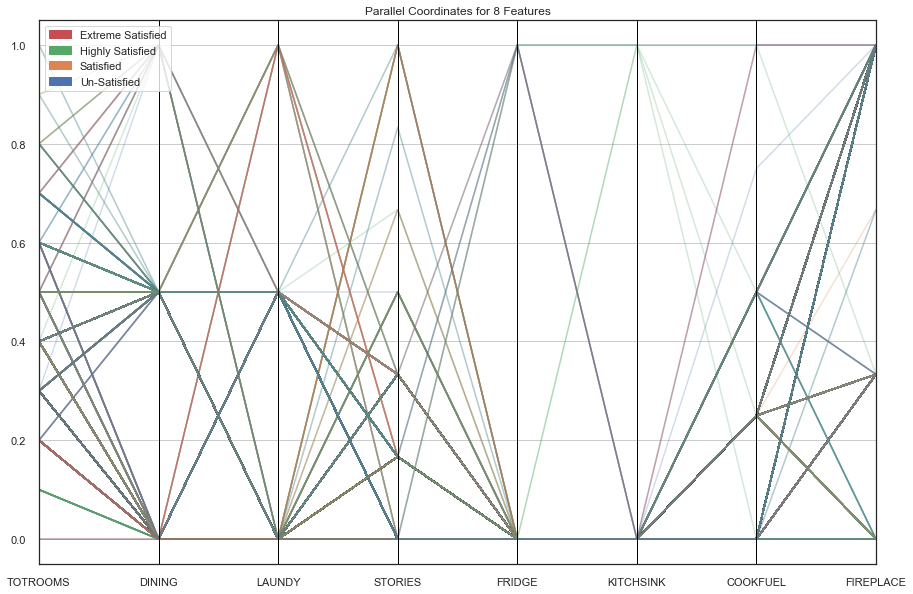

In [44]:
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
features = [
    'TOTROOMS','DINING', 'LAUNDY', 'STORIES', 'FRIDGE', 'KITCHSINK', 'COOKFUEL', 'FIREPLACE'
]
classes = ["Un-Satisfied", "Satisfied","Highly Satisfied","Extreme Satisfied"]

# Instantiate the visualizer
visualizer = ParallelCoordinates(
    classes=classes, features=features,
    normalize='minmax', 
    sample=0.05, shuffle=True, size=(1080, 720)
)

# Fit the visualizer and display it
visualizer.fit(X, y)
visualizer.transform(X)

visualizer.show()

## Feature Importance

In [22]:
X = df


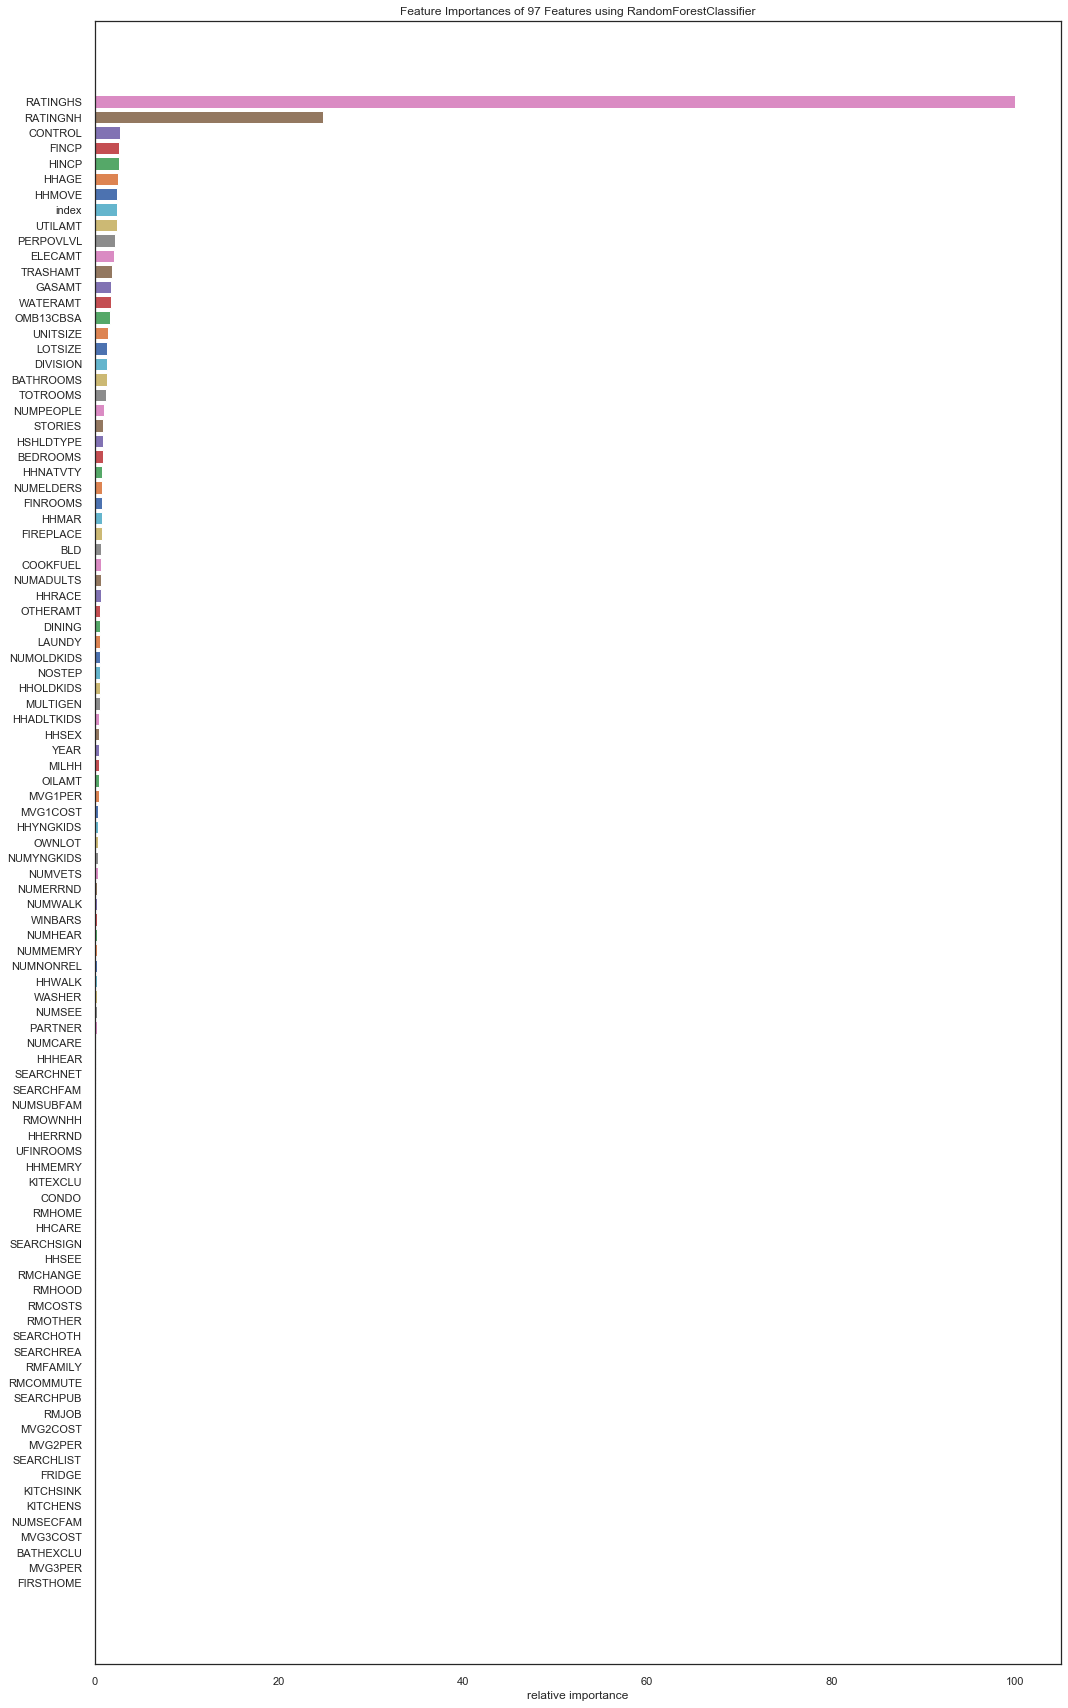

In [46]:
#Using Randomforest classifier
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.features import FeatureImportances

model = RandomForestClassifier(n_estimators=10)
viz = FeatureImportances(model, size=(1080, 1720))

viz.fit(X, y)
viz.show()

In [47]:
# Create a dictionary that will map the feature name with its feature importance
feats = {}

# Loop through Feature
for feature, importance in zip(X.columns, model.feature_importances_):
    feats[feature] = importance # Add the name/value pair

# View our dictionary, but sorted in order of importance
sorted(feats.items(), key=lambda x: x[1], reverse=True)

[('RATINGHS', 0.5445327574371619),
 ('RATINGNH', 0.13482454118228054),
 ('CONTROL', 0.014997868578325396),
 ('FINCP', 0.01451836678694387),
 ('HINCP', 0.014141438922109405),
 ('HHAGE', 0.013749933212466151),
 ('HHMOVE', 0.013238157643821963),
 ('index', 0.013213881467690652),
 ('UTILAMT', 0.012799028705874946),
 ('PERPOVLVL', 0.01167160597644264),
 ('ELECAMT', 0.011467387971655422),
 ('TRASHAMT', 0.009854405659846233),
 ('GASAMT', 0.009613949800315496),
 ('WATERAMT', 0.009323011265933451),
 ('OMB13CBSA', 0.009068437738970208),
 ('UNITSIZE', 0.00797937800646382),
 ('LOTSIZE', 0.007403562207643657),
 ('DIVISION', 0.0072803641746190025),
 ('BATHROOMS', 0.006908192710627046),
 ('TOTROOMS', 0.006525153055560876),
 ('NUMPEOPLE', 0.005143393914162717),
 ('STORIES', 0.004723349340560281),
 ('HSHLDTYPE', 0.004642756067537324),
 ('BEDROOMS', 0.004585091857951311),
 ('HHNATVTY', 0.004448312072684676),
 ('NUMELDERS', 0.004284699175564504),
 ('FINROOMS', 0.0042276307949684535),
 ('HHMAR', 0.0042252

/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/yellowbrick/model_selection/importances.py:195: YellowbrickWarning: detected multi-dimensional feature importances but stack=False, using mean to aggregate them.
  YellowbrickWarning,


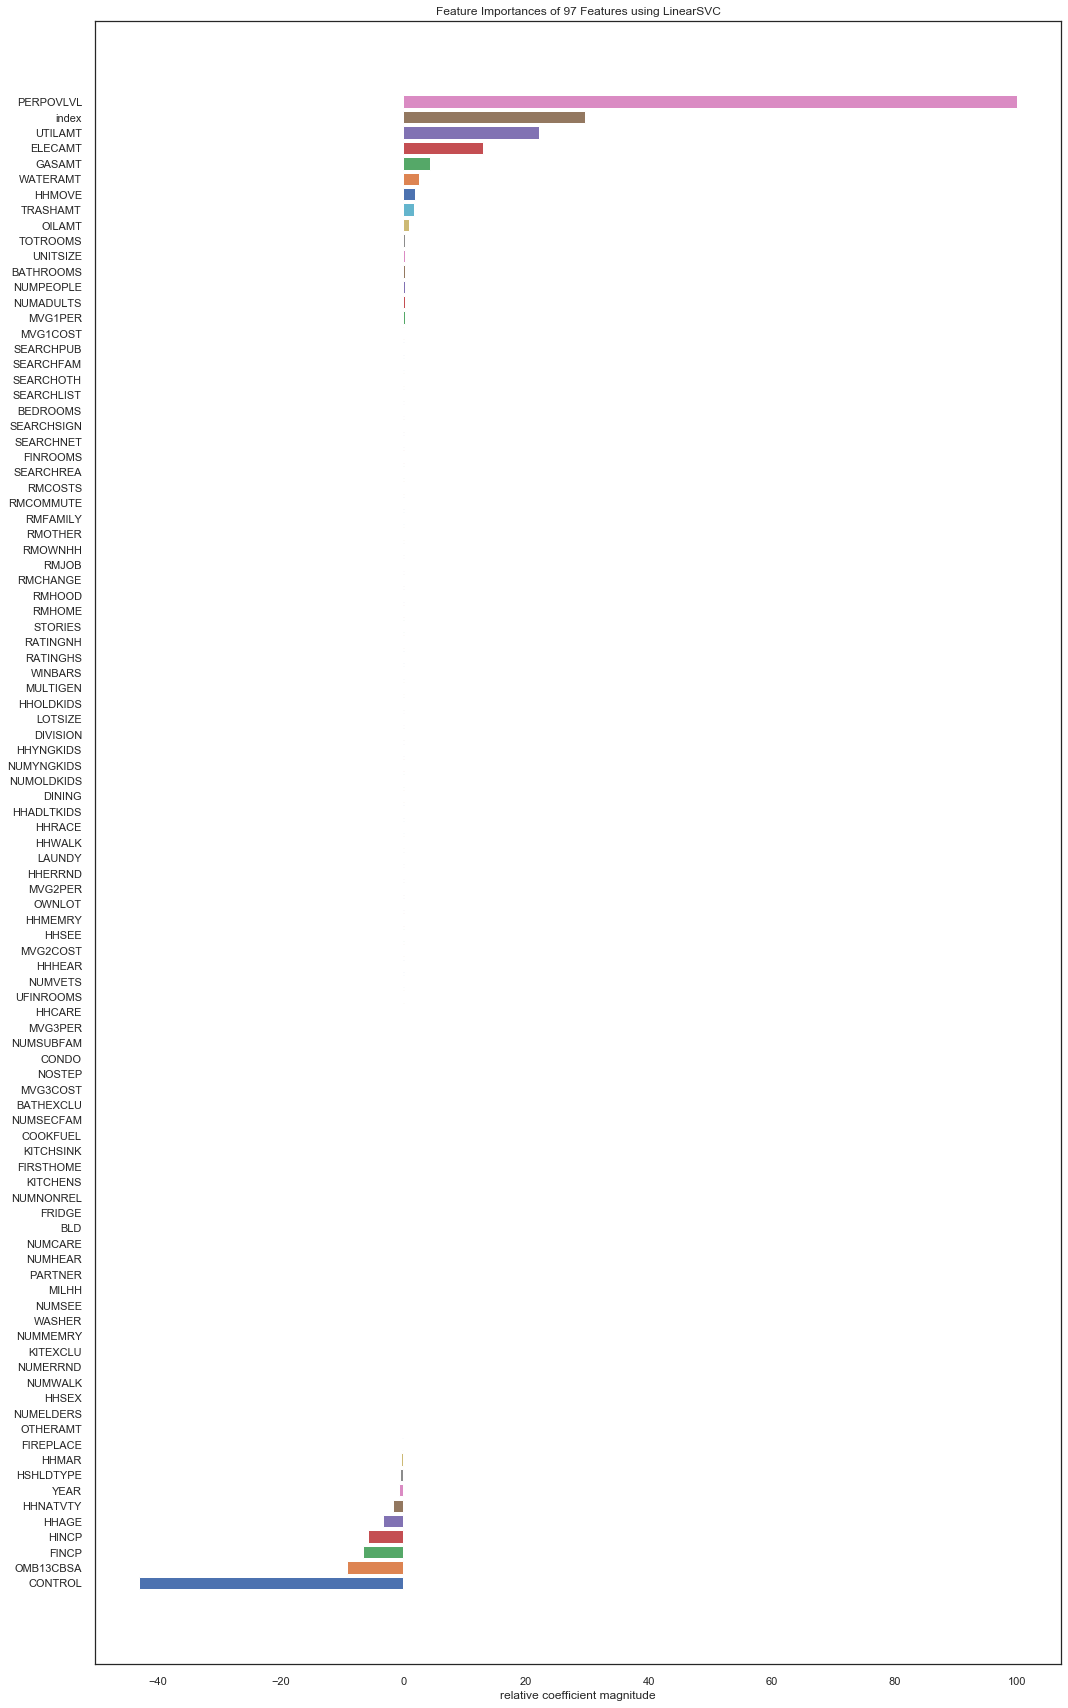

In [48]:
# Using LinearSVC model
from sklearn import svm
from yellowbrick.features import FeatureImportances

model = svm.LinearSVC()
viz = FeatureImportances(model, size=(1080, 1720))

viz.fit(X, y)
viz.show()

/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2530: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: divide by zero encountered in true_divide
  c /= stddev[None, :]
/Users/sabashaikh/anaconda2/envs/py36/lib/python3.6/site-packages/numpy/lib/function_base.py:2531: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


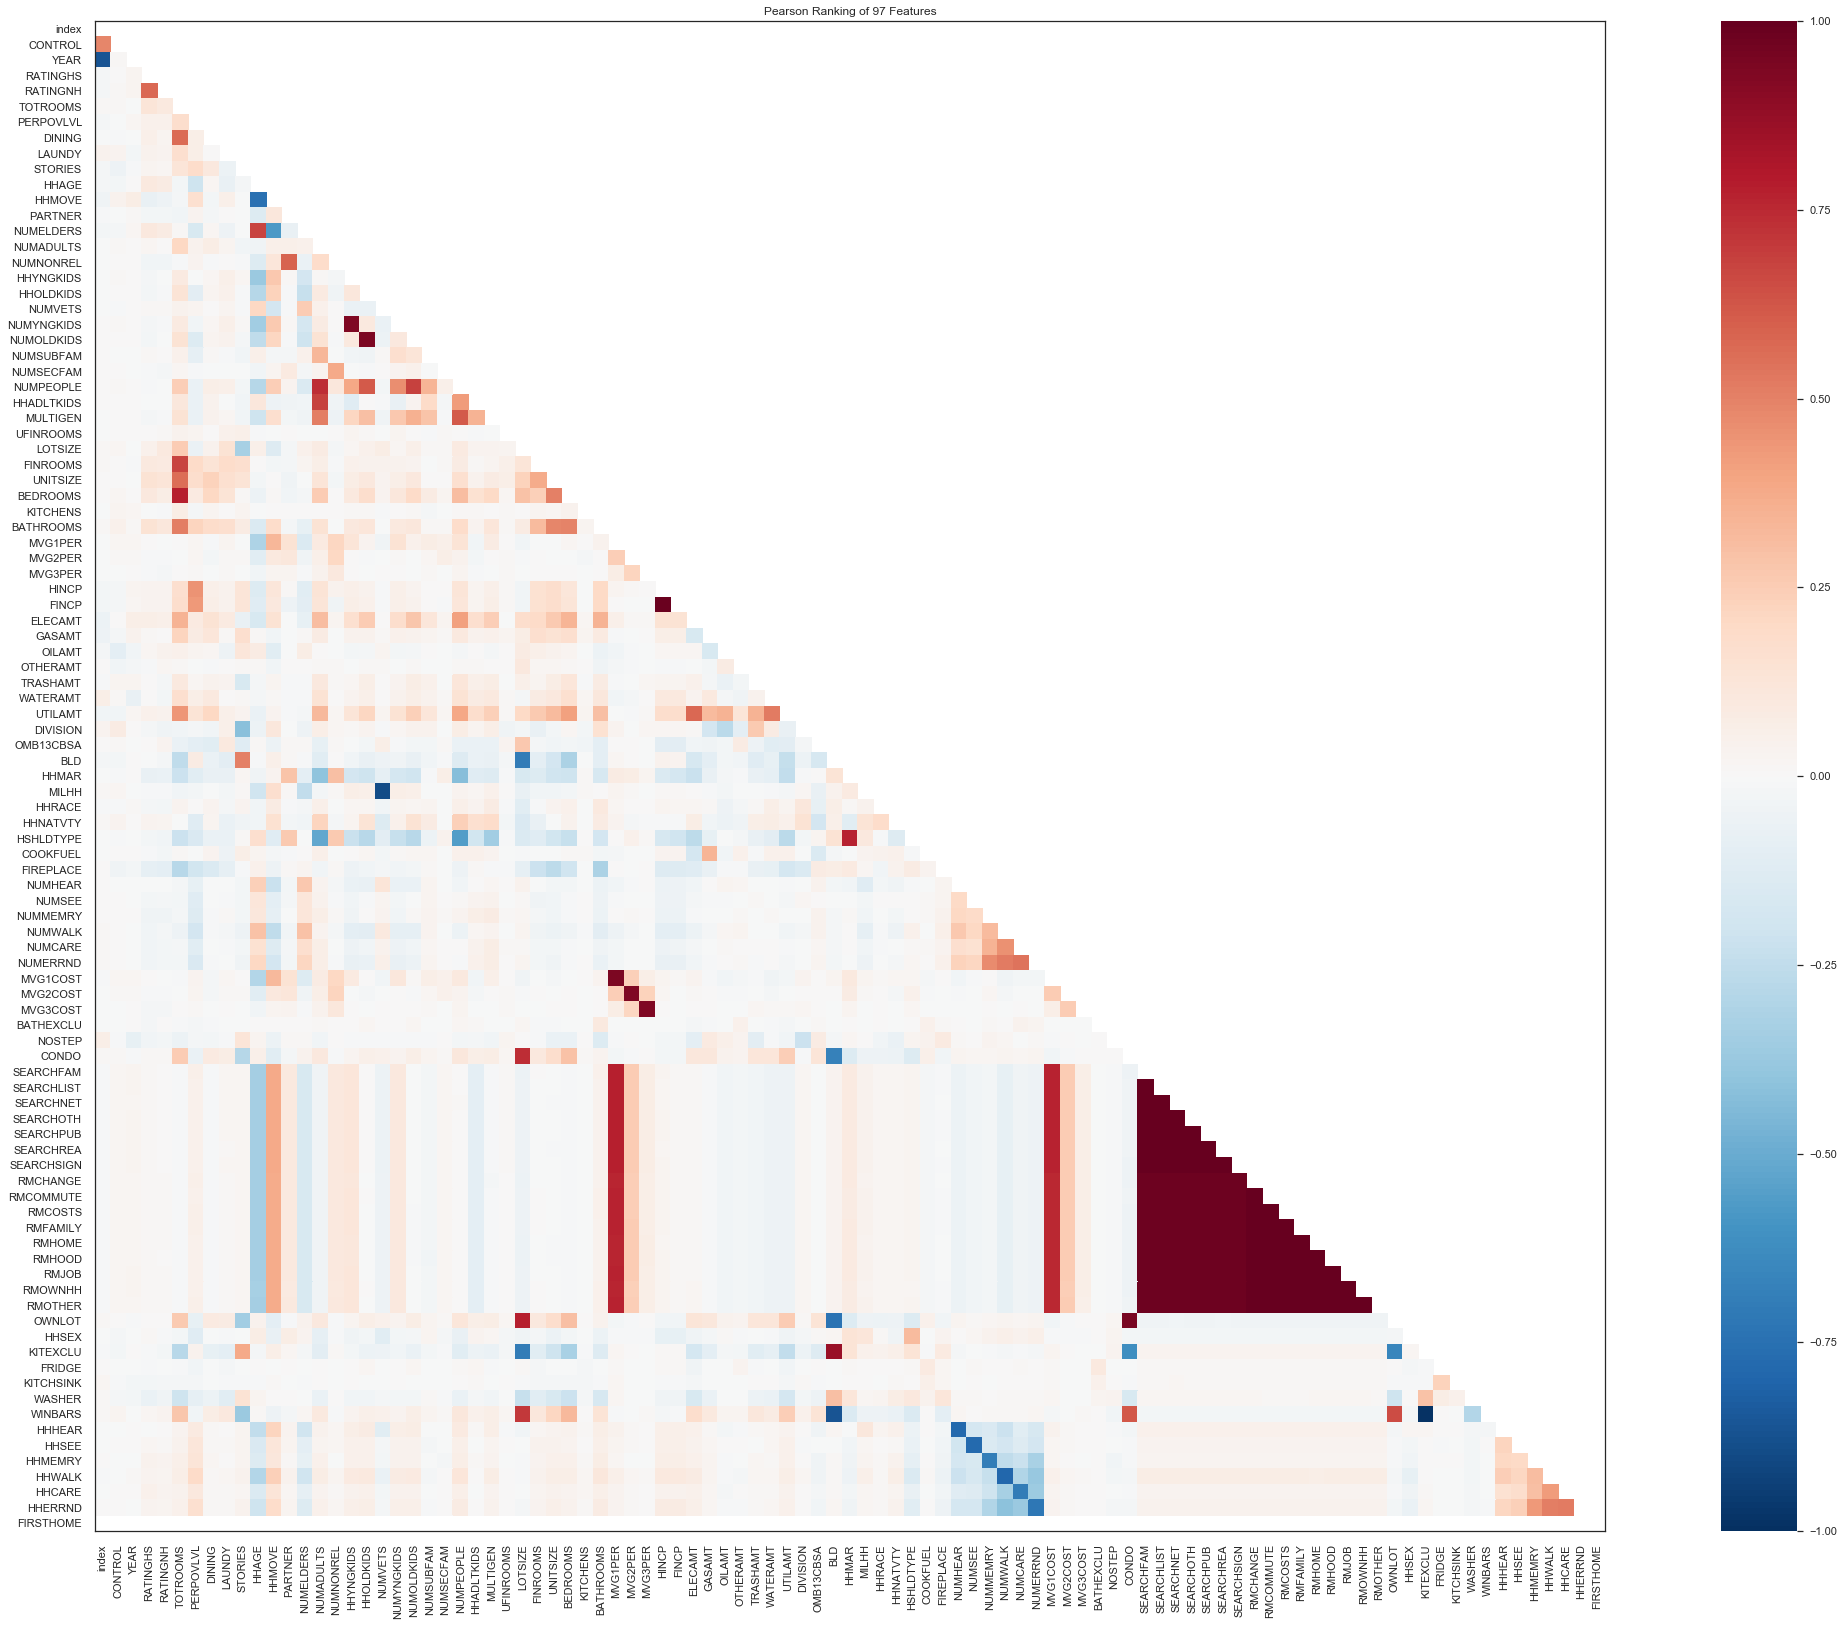

In [49]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Pearson ranking algorithm
visualizer = Rank2D(algorithm='pearson', size=(3000, 2000))

visualizer.fit(X, y)
visualizer.transform(X)
visualizer.show()

### let's drop SEARCH* relative features since they are highly correlative. Also reason for move features are correlative, let's drop them


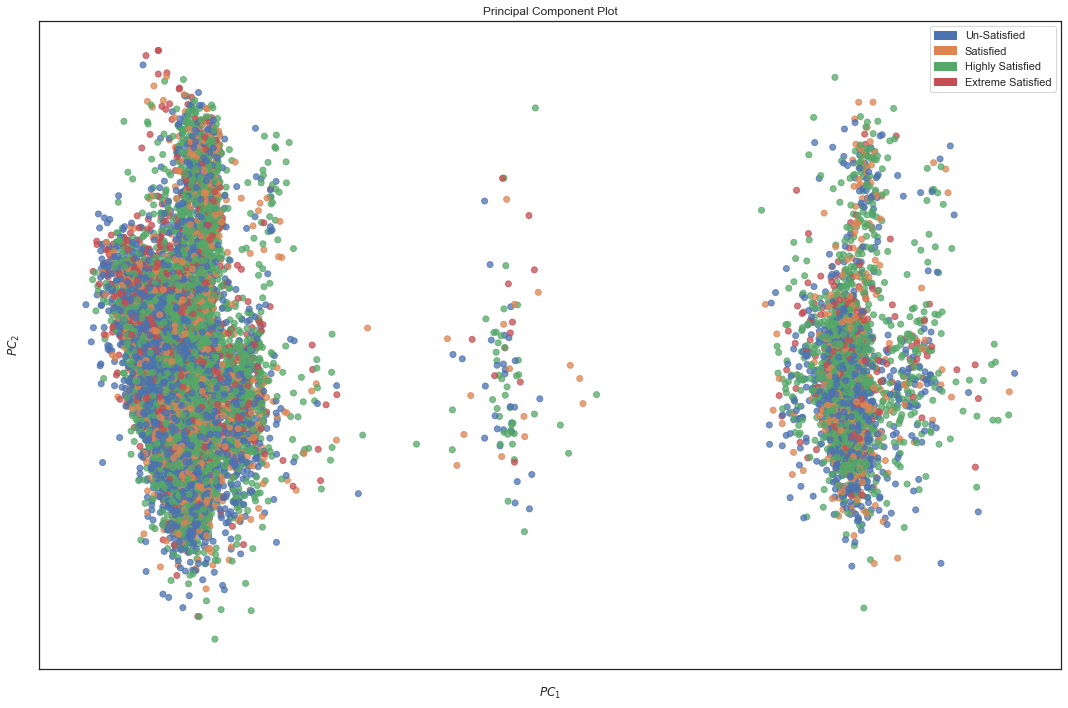

In [50]:
from yellowbrick.features.pca import PCADecomposition

# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi else 'b' for yi in y])

visualizer = PCADecomposition(
    classes=classes,
    scale=True, color=colors, size=(1080, 720)
)
visualizer.fit(X, y)
visualizer.transform(X, y)
visualizer.show()

## Feature Selection

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
model = Lasso()
model.fit(X, y)
print(list(zip(X, model.coef_.tolist())))

[('index', -2.1787125102120423e-06), ('CONTROL', 4.793635790411929e-07), ('YEAR', 0.0), ('RATINGHS', 0.5811896010388214), ('RATINGNH', 0.0), ('TOTROOMS', 0.0), ('PERPOVLVL', 0.000168357498795372), ('DINING', 0.0), ('LAUNDY', 0.0), ('STORIES', 0.0), ('HHAGE', 0.0005486343148169746), ('HHMOVE', -0.0), ('PARTNER', -0.0), ('NUMELDERS', 0.0), ('NUMADULTS', -0.0), ('NUMNONREL', -0.0), ('HHYNGKIDS', -0.0), ('HHOLDKIDS', -0.0), ('NUMVETS', 0.0), ('NUMYNGKIDS', -0.0), ('NUMOLDKIDS', -0.0), ('NUMSUBFAM', 0.0), ('NUMSECFAM', -0.0), ('NUMPEOPLE', -0.0), ('HHADLTKIDS', -0.0), ('MULTIGEN', -0.0), ('UFINROOMS', 0.0), ('LOTSIZE', 0.0), ('FINROOMS', 0.0), ('UNITSIZE', 0.0), ('BEDROOMS', 0.0), ('KITCHENS', -0.0), ('BATHROOMS', 0.0), ('MVG1PER', 0.0), ('MVG2PER', -0.0), ('MVG3PER', -0.0), ('HINCP', -4.421892215695339e-07), ('FINCP', 5.285706918708479e-07), ('ELECAMT', 0.00023240302669996294), ('GASAMT', 0.0), ('OILAMT', 0.0), ('OTHERAMT', -0.0), ('TRASHAMT', -0.0), ('WATERAMT', -0.0), ('UTILAMT', 0.00010